### Setting paths and imports

In [1]:
import sys
import os
import pandas as pd

module_path = os.path.abspath(os.path.join('..'))
sys.path.append(module_path)
module_path

'c:\\Work\\AIIM\\gretel-silver\\GRETEL'

In [2]:
os.chdir(module_path)

In [3]:
from src.evaluation.evaluator_manager import EvaluatorManager
from src.evaluation.evaluator_manager_do import EvaluatorManager as PairedEvaluatorManager
from src.utils.context import Context
from src.data_analysis.data_analyzer import DataAnalyzer as data_analyzer 

# Select the Best Explanation

In [4]:
# Tree-Cycles
config_f_name = 'E6-TCR-128-28-0.25_GCN_Ens[DCE+OBS+iRand+RSGG]-BestSelect.jsonc'
# ASD
# config_f_name = 'E1-ASD_ASDO_Ens[DCE+OBS+iRand+RSGG]-BestSelect.jsonc'

### Evaluating the explainer

In [5]:
config_path = os.path.join(module_path, 'lab', 'config', config_f_name)
runno = 2
    
print(f"Generating context for: {config_path}")
context = Context.get_context(config_path)
context.run_number = runno

context.logger.info(f"Executing: {context.config_file} Run: {context.run_number}")
context.logger.info("Creating the evaluation manager....................................")


if 'do-pairs' in context.conf:
    context.logger.info("Creating the paired  evaluators.....................................")
    eval_manager = PairedEvaluatorManager(context)
else:
    context.logger.info("Creating the evaluators......................................................")
    eval_manager = EvaluatorManager(context)

context.logger.info(
    "Evaluating the explainers............................................................."
)
eval_manager.evaluate()


Generating context for: c:\Work\AIIM\gretel-silver\GRETEL\lab\config\E6-TCR-128-28-0.25_GCN_Ens[DCE+OBS+iRand+RSGG]-BestSelect.jsonc
2024-05-01 19:20:18,892067789 | INFO | 27796 - Executing: c:\Work\AIIM\gretel-silver\GRETEL\lab\config\E6-TCR-128-28-0.25_GCN_Ens[DCE+OBS+iRand+RSGG]-BestSelect.jsonc Run: 2
2024-05-01 19:20:18,892067813 | INFO | 27796 - Creating the evaluation manager....................................
2024-05-01 19:20:18,892067834 | INFO | 27796 - Creating the paired  evaluators.....................................
2024-05-01 19:20:19,892067915 | INFO | 27796 - Loading: TreeCyclesRand-266bb3721206805597afc8c4184fe0ab
2024-05-01 19:20:19,892067974 | INFO | 27796 - Created: TreeCyclesRand-266bb3721206805597afc8c4184fe0ab
2024-05-01 19:20:19,892067988 | INFO | 27796 - Instantiating: src.oracle.nn.gcn.DownstreamGCN
2024-05-01 19:20:19,892068069 | INFO | 27796 - Instantiating: torch.optim.RMSprop
2024-05-01 19:20:19,892068070 | INFO | 27796 - Instantiating: torch.nn.CrossEn

c:\Work\AIIM\gretel-silver\GRETEL\src\explainer\generative\gans\graph\res_gen.py:61: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\TensorShape.cpp:3641.)
  edge_probabilities += rebuild_adj_matrix(len(node_features), edge_list, edge_attr.T,self.device)


2024-05-01 19:20:41,892090716 | INFO | 27796 - evaluated instance with id 1
2024-05-01 19:20:41,892090718 | INFO | 27796 - Evaluating instance with id 2
2024-05-01 19:20:46,892095028 | INFO | 27796 - evaluated instance with id 2
2024-05-01 19:20:46,892095029 | INFO | 27796 - Evaluating instance with id 3
2024-05-01 19:20:50,892099280 | INFO | 27796 - evaluated instance with id 3
2024-05-01 19:20:50,892099281 | INFO | 27796 - Evaluating instance with id 4
2024-05-01 19:20:54,892103669 | INFO | 27796 - evaluated instance with id 4
2024-05-01 19:20:54,892103669 | INFO | 27796 - Evaluating instance with id 5
2024-05-01 19:20:58,892107799 | INFO | 27796 - evaluated instance with id 5
2024-05-01 19:20:58,892107799 | INFO | 27796 - Evaluating instance with id 6
2024-05-01 19:21:03,892112548 | INFO | 27796 - evaluated instance with id 6
2024-05-01 19:21:03,892112549 | INFO | 27796 - Evaluating instance with id 7
2024-05-01 19:21:05,892114282 | INFO | 27796 - evaluated instance with id 7
2024-0

### Aggregating the stats

In [6]:
results_path = os.path.join(module_path, 'lab', 'output', 'results')
stats_file_path = os.path.join(module_path, 'lab', 'stats', 'results.csv')
res = data_analyzer.create_aggregated_dataframe(results_path)
res.to_csv(stats_file_path)
res

2024-05-01 19:29:39,892628856 | INFO | 27796 - Instantiating: src.evaluation.evaluation_metric_runtime.RuntimeMetric
2024-05-01 19:29:39,892628858 | INFO | 27796 - Instantiating: src.evaluation.evaluation_metric_ged.GraphEditDistanceMetric
2024-05-01 19:29:39,892628859 | INFO | 27796 - Instantiating: src.evaluation.evaluation_metric_oracle_calls.OracleCallsMetric
2024-05-01 19:29:39,892628861 | INFO | 27796 - Instantiating: src.evaluation.evaluation_metric_correctness.CorrectnessMetric
2024-05-01 19:29:39,892628863 | INFO | 27796 - Instantiating: src.evaluation.evaluation_metric_sparsity.SparsityMetric
2024-05-01 19:29:39,892628864 | INFO | 27796 - Instantiating: src.evaluation.evaluation_metric_fidelity.FidelityMetric
2024-05-01 19:29:39,892628866 | INFO | 27796 - Instantiating: src.evaluation.evaluation_metric_oracle_accuracy.OracleAccuracyMetric
2024-05-01 19:29:39,892628870 | INFO | 27796 - Instantiating: src.evaluation.evaluation_metric_runtime.RuntimeMetric
2024-05-01 19:29:39,89

2024-05-01 19:29:40,892628898 | INFO | 27796 - Instantiating: src.evaluation.evaluation_metric_runtime.RuntimeMetric
2024-05-01 19:29:40,892628898 | INFO | 27796 - Instantiating: src.evaluation.evaluation_metric_ged.GraphEditDistanceMetric
2024-05-01 19:29:40,892628900 | INFO | 27796 - Instantiating: src.evaluation.evaluation_metric_oracle_calls.OracleCallsMetric
2024-05-01 19:29:40,892628901 | INFO | 27796 - Instantiating: src.evaluation.evaluation_metric_correctness.CorrectnessMetric
2024-05-01 19:29:40,892628901 | INFO | 27796 - Instantiating: src.evaluation.evaluation_metric_sparsity.SparsityMetric
2024-05-01 19:29:40,892628905 | INFO | 27796 - Instantiating: src.evaluation.evaluation_metric_fidelity.FidelityMetric
2024-05-01 19:29:40,892628906 | INFO | 27796 - Instantiating: src.evaluation.evaluation_metric_oracle_accuracy.OracleAccuracyMetric
2024-05-01 19:29:40,892628913 | INFO | 27796 - Instantiating: src.evaluation.evaluation_metric_runtime.RuntimeMetric
2024-05-01 19:29:40,89

,scope,dataset,oracle,explainer,RuntimeMetric,RuntimeMetric-std,GraphEditDistanceMetric,GraphEditDistanceMetric-std,OracleCallsMetric,OracleCallsMetric-std,CorrectnessMetric,CorrectnessMetric-std,SparsityMetric,SparsityMetric-std,FidelityMetric,FidelityMetric-std,OracleAccuracyMetric,OracleAccuracyMetric-std
0,demo,ASD-15273954d84e872cf0b021cd4477bfdc,ASDOracle-9e4f3586dc330143b7849fc540b25739,ObliviousBidirectionalSearchExplainer,0.409879,0.000000,10.454545,0.000000,367.363636,0.000000,1.000000,0.000000,0.013553,0.000000e+00,0.636364,0.000000,0.818182,0.0
1,demo,TreeCyclesRand-19c1e767fe0a580f23abfb7486c24b37,OracleTorch-f16f95a68a8f23c404f4684325d241af,ObliviousBidirectionalSearchExplainer,1.417809,0.914864,4.454545,0.454545,239.615385,155.692308,0.923077,0.076923,0.063462,1.174480e-03,0.923077,0.076923,1.000000,0.0
2,demo,TreeCyclesRand-b7fc179170d4f9e81e9efdc2d9265e91,TreeCyclesOracle-e67513927e99743ff3718c388e68fb02,RSGG,0.063364,0.015690,23.760000,0.590000,15.640000,2.160000,1.000000,0.000000,0.427735,1.044173e-02,1.000000,0.000000,1.000000,0.0
3,ensembles,ASD-ca8cc36049eb8589f68c35b0d8eebfbb,ASDOracle-74012801e4bd624973d6c15c0a46f2eb,ExplanationFrequency,5.226193,0.227379,561.190883,20.283476,1012.806931,3.321782,0.460396,0.074257,0.665147,1.905344e-02,0.232673,0.024752,0.772277,0.0
4,ensembles,ASD-ca8cc36049eb8589f68c35b0d8eebfbb,ASDOracle-74012801e4bd624973d6c15c0a46f2eb,ExplanationIntersection,5.194375,0.005148,583.252976,0.877976,1032.886139,4.232673,0.405941,0.009901,0.662231,7.808701e-03,0.227723,0.009901,0.772277,0.0
5,ensembles,ASD-ca8cc36049eb8589f68c35b0d8eebfbb,ASDOracle-74012801e4bd624973d6c15c0a46f2eb,ExplanationRandom,7.619725,0.000000,14.104167,0.000000,1029.891089,0.000000,0.237624,0.000000,0.004347,0.000000e+00,0.138614,0.000000,0.772277,0.0
6,ensembles,ASD-ca8cc36049eb8589f68c35b0d8eebfbb,ASDOracle-74012801e4bd624973d6c15c0a46f2eb,ExplanationTopSelect,5.141137,0.016324,10.029703,0.000000,1029.495050,25.792079,1.000000,0.000000,0.013008,1.131176e-07,0.544554,0.000000,0.772277,0.0
7,ensembles,ASD-ca8cc36049eb8589f68c35b0d8eebfbb,ASDOracle-74012801e4bd624973d6c15c0a46f2eb,ExplanationUnion,6.153826,0.987345,540.351852,2.370370,1007.658416,3.648515,0.534653,0.000000,0.679479,5.700593e-04,0.257426,0.000000,0.772277,0.0
8,ensembles,TreeCyclesRand-266bb3721206805597afc8c4184fe0ab,OracleTorch-74759045c06692032f0eea69f225627c,ExplanationRandom,3.266816,0.106357,4.909497,0.974714,413.289062,101.515625,0.550781,0.191406,0.052175,2.566187e-02,0.550781,0.191406,1.000000,0.0
9,ensembles,TreeCyclesRand-266bb3721206805597afc8c4184fe0ab,OracleTorch-74759045c06692032f0eea69f225627c,ExplanationTopSelect,3.332705,0.000000,5.543307,0.000000,558.210938,0.000000,0.992188,0.000000,0.098910,0.000000e+00,0.992188,0.000000,1.000000,0.0


### Visualizing individual instances

In [10]:
evaluator = eval_manager.evaluators[0]
evaluator

In [11]:
inst_cf_pairs = evaluator.get_instance_explanation_pairs()
og_inst = inst_cf_pairs[2][0]
cf_inst = inst_cf_pairs[2][1]

In [12]:

changes = data_analyzer.get_cf_changes(og_inst, cf_inst, False)

In [13]:
common_edges = changes['common edges']
added_edges = changes['added edges']
removed_edges = changes['removed edges']
common_nodes = changes['common nodes']
added_nodes = changes['added nodes']
removed_nodes = changes['removed nodes']

print(f'added edges: {added_edges}')
print(f'removed_edges: {removed_edges}')
print(f'added nodes: {added_nodes}')
print(f'removed nodes: {removed_nodes}')

added edges: [(0, 26), (5, 21), (8, 25)]
removed_edges: [(25, 26)]
added nodes: []
removed nodes: []


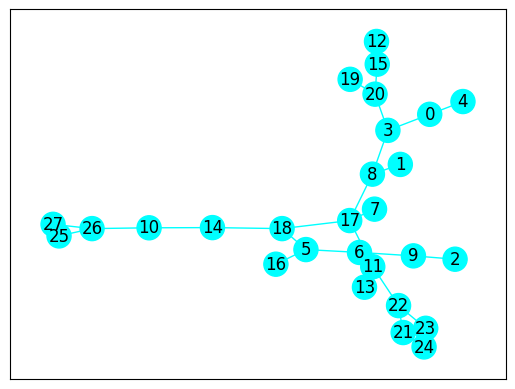

In [14]:
pos = data_analyzer.draw_graph(og_inst)

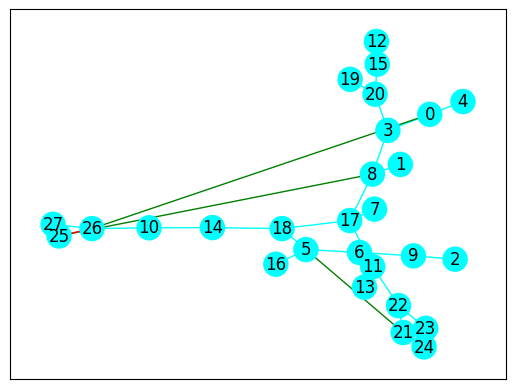

In [15]:
data_analyzer.draw_counterfactual_actions(og_inst, cf_inst, position=pos)

# Explanations Union

### Setting Imports

In [4]:
# Tree-Cycles
config_f_name = 'E7-TCR-128-28-0.25_GCN_Ens[DCE+OBS+iRand+RSGG]-Union.jsonc'
# ASD
# config_f_name = 'E2-ASD_ASDO_Ens[DCE+OBS+iRand+RSGG]-Union.jsonc'

### Evaluating the Explainer

In [5]:
config_path = os.path.join(module_path, 'lab', 'config', config_f_name)
runno = 2
    
print(f"Generating context for: {config_path}")
context = Context.get_context(config_path)
context.run_number = runno

context.logger.info(f"Executing: {context.config_file} Run: {context.run_number}")
context.logger.info("Creating the evaluation manager....................................")


if 'do-pairs' in context.conf:
    context.logger.info(f"Creating the paired  evaluators.....................................")
    eval_manager = PairedEvaluatorManager(context)
else:
    context.logger.info("Creating the evaluators......................................................")
    eval_manager = EvaluatorManager(context)

context.logger.info(
    "Evaluating the explainers............................................................."
)
eval_manager.evaluate()

Generating context for: c:\Work\AIIM\gretel-silver\GRETEL\lab\config\E7-TCR-128-28-0.25_GCN_Ens[DCE+OBS+iRand+RSGG]-Union.jsonc
2024-05-01 19:42:33,893402822 | INFO | 2176 - Executing: c:\Work\AIIM\gretel-silver\GRETEL\lab\config\E7-TCR-128-28-0.25_GCN_Ens[DCE+OBS+iRand+RSGG]-Union.jsonc Run: 2
2024-05-01 19:42:33,893402844 | INFO | 2176 - Creating the evaluation manager....................................
2024-05-01 19:42:33,893402866 | INFO | 2176 - Creating the paired  evaluators.....................................
2024-05-01 19:42:34,893402943 | INFO | 2176 - Loading: TreeCyclesRand-266bb3721206805597afc8c4184fe0ab
2024-05-01 19:42:34,893402999 | INFO | 2176 - Created: TreeCyclesRand-266bb3721206805597afc8c4184fe0ab
2024-05-01 19:42:34,893403012 | INFO | 2176 - Instantiating: src.oracle.nn.gcn.DownstreamGCN
2024-05-01 19:42:34,893403093 | INFO | 2176 - Instantiating: torch.optim.RMSprop
2024-05-01 19:42:34,893403095 | INFO | 2176 - Instantiating: torch.nn.CrossEntropyLoss
2024-05-

c:\Work\AIIM\gretel-silver\GRETEL\src\explainer\generative\gans\graph\res_gen.py:61: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\TensorShape.cpp:3641.)
  edge_probabilities += rebuild_adj_matrix(len(node_features), edge_list, edge_attr.T,self.device)


2024-05-01 19:42:57,893426609 | INFO | 2176 - evaluated instance with id 1
2024-05-01 19:42:57,893426609 | INFO | 2176 - Evaluating instance with id 2
2024-05-01 19:43:02,893431145 | INFO | 2176 - evaluated instance with id 2
2024-05-01 19:43:02,893431146 | INFO | 2176 - Evaluating instance with id 3
2024-05-01 19:43:06,893435579 | INFO | 2176 - evaluated instance with id 3
2024-05-01 19:43:06,893435579 | INFO | 2176 - Evaluating instance with id 4
2024-05-01 19:43:11,893440117 | INFO | 2176 - evaluated instance with id 4
2024-05-01 19:43:11,893440118 | INFO | 2176 - Evaluating instance with id 5
2024-05-01 19:43:15,893444761 | INFO | 2176 - evaluated instance with id 5
2024-05-01 19:43:15,893444762 | INFO | 2176 - Evaluating instance with id 6
2024-05-01 19:43:21,893449931 | INFO | 2176 - evaluated instance with id 6
2024-05-01 19:43:21,893449932 | INFO | 2176 - Evaluating instance with id 7
2024-05-01 19:43:22,893451343 | INFO | 2176 - evaluated instance with id 7
2024-05-01 19:43:22

KeyboardInterrupt: 

### Aggregatting the Results

In [19]:
results_path = os.path.join(module_path, 'lab', 'output', 'results')
stats_file_path = os.path.join(module_path, 'lab', 'stats', 'results.csv')
res = data_analyzer.create_aggregated_dataframe(results_path)
res.to_csv(stats_file_path)
res

2024-05-01 19:38:58,893187754 | INFO | 27796 - Instantiating: src.evaluation.evaluation_metric_runtime.RuntimeMetric
2024-05-01 19:38:58,893187756 | INFO | 27796 - Instantiating: src.evaluation.evaluation_metric_ged.GraphEditDistanceMetric
2024-05-01 19:38:58,893187757 | INFO | 27796 - Instantiating: src.evaluation.evaluation_metric_oracle_calls.OracleCallsMetric
2024-05-01 19:38:58,893187759 | INFO | 27796 - Instantiating: src.evaluation.evaluation_metric_correctness.CorrectnessMetric
2024-05-01 19:38:58,893187761 | INFO | 27796 - Instantiating: src.evaluation.evaluation_metric_sparsity.SparsityMetric
2024-05-01 19:38:58,893187762 | INFO | 27796 - Instantiating: src.evaluation.evaluation_metric_fidelity.FidelityMetric
2024-05-01 19:38:58,893187763 | INFO | 27796 - Instantiating: src.evaluation.evaluation_metric_oracle_accuracy.OracleAccuracyMetric
2024-05-01 19:38:58,893187766 | INFO | 27796 - Instantiating: src.evaluation.evaluation_metric_runtime.RuntimeMetric
2024-05-01 19:38:58,89

,scope,dataset,oracle,explainer,RuntimeMetric,RuntimeMetric-std,GraphEditDistanceMetric,GraphEditDistanceMetric-std,OracleCallsMetric,OracleCallsMetric-std,CorrectnessMetric,CorrectnessMetric-std,SparsityMetric,SparsityMetric-std,FidelityMetric,FidelityMetric-std,OracleAccuracyMetric,OracleAccuracyMetric-std
0,demo,ASD-15273954d84e872cf0b021cd4477bfdc,ASDOracle-9e4f3586dc330143b7849fc540b25739,ObliviousBidirectionalSearchExplainer,0.409879,0.000000,10.454545,0.000000,367.363636,0.000000,1.000000,0.000000,0.013553,0.000000e+00,0.636364,0.000000,0.818182,0.0
1,demo,TreeCyclesRand-19c1e767fe0a580f23abfb7486c24b37,OracleTorch-f16f95a68a8f23c404f4684325d241af,ObliviousBidirectionalSearchExplainer,1.417809,0.914864,4.454545,0.454545,239.615385,155.692308,0.923077,0.076923,0.063462,1.174480e-03,0.923077,0.076923,1.000000,0.0
2,demo,TreeCyclesRand-b7fc179170d4f9e81e9efdc2d9265e91,TreeCyclesOracle-e67513927e99743ff3718c388e68fb02,RSGG,0.063364,0.015690,23.760000,0.590000,15.640000,2.160000,1.000000,0.000000,0.427735,1.044173e-02,1.000000,0.000000,1.000000,0.0
3,ensembles,ASD-ca8cc36049eb8589f68c35b0d8eebfbb,ASDOracle-74012801e4bd624973d6c15c0a46f2eb,ExplanationFrequency,5.226193,0.227379,561.190883,20.283476,1012.806931,3.321782,0.460396,0.074257,0.665147,1.905344e-02,0.232673,0.024752,0.772277,0.0
4,ensembles,ASD-ca8cc36049eb8589f68c35b0d8eebfbb,ASDOracle-74012801e4bd624973d6c15c0a46f2eb,ExplanationIntersection,5.194375,0.005148,583.252976,0.877976,1032.886139,4.232673,0.405941,0.009901,0.662231,7.808701e-03,0.227723,0.009901,0.772277,0.0
5,ensembles,ASD-ca8cc36049eb8589f68c35b0d8eebfbb,ASDOracle-74012801e4bd624973d6c15c0a46f2eb,ExplanationRandom,7.619725,0.000000,14.104167,0.000000,1029.891089,0.000000,0.237624,0.000000,0.004347,0.000000e+00,0.138614,0.000000,0.772277,0.0
6,ensembles,ASD-ca8cc36049eb8589f68c35b0d8eebfbb,ASDOracle-74012801e4bd624973d6c15c0a46f2eb,ExplanationTopSelect,5.141137,0.016324,10.029703,0.000000,1029.495050,25.792079,1.000000,0.000000,0.013008,1.131176e-07,0.544554,0.000000,0.772277,0.0
7,ensembles,ASD-ca8cc36049eb8589f68c35b0d8eebfbb,ASDOracle-74012801e4bd624973d6c15c0a46f2eb,ExplanationUnion,6.153826,0.987345,540.351852,2.370370,1007.658416,3.648515,0.534653,0.000000,0.679479,5.700593e-04,0.257426,0.000000,0.772277,0.0
8,ensembles,TreeCyclesRand-266bb3721206805597afc8c4184fe0ab,OracleTorch-74759045c06692032f0eea69f225627c,ExplanationRandom,3.266816,0.106357,4.909497,0.974714,413.289062,101.515625,0.550781,0.191406,0.052175,2.566187e-02,0.550781,0.191406,1.000000,0.0
9,ensembles,TreeCyclesRand-266bb3721206805597afc8c4184fe0ab,OracleTorch-74759045c06692032f0eea69f225627c,ExplanationTopSelect,2.466957,0.865748,5.356299,0.187008,418.710938,139.500000,0.992188,0.000000,0.097369,1.541162e-03,0.992188,0.000000,1.000000,0.0


In [7]:
evaluator = eval_manager.evaluators[0]
evaluator

In [8]:
inst_cf_pairs = evaluator.get_instance_explanation_pairs()
og_inst = inst_cf_pairs[2][0]
cf_inst = inst_cf_pairs[2][1]

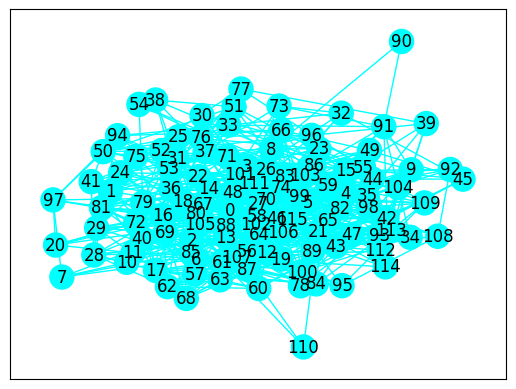

In [9]:
pos = data_analyzer.draw_graph(og_inst)

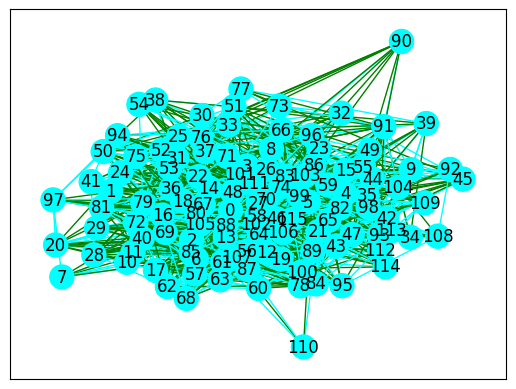

In [10]:
data_analyzer.draw_counterfactual_actions(og_inst, cf_inst, position=pos)

# Explanations Intersection

In [4]:
# Tree-Cycles
config_f_name = 'E8-TCR-128-28-0.25_GCN_Ens[DCE+OBS+iRand+RSGG]-Intersection.jsonc'
# ASD
# config_f_name = 'E3-ASD_ASDO_Ens[DCE+OBS+iRand+RSGG]-Intersection.jsonc'

### Evaluating the Explainer

In [5]:
config_path = os.path.join(module_path, 'lab', 'config', config_f_name)
runno = 2
    
print(f"Generating context for: {config_path}")
context = Context.get_context(config_path)
context.run_number = runno

context.logger.info(f"Executing: {context.config_file} Run: {context.run_number}")
context.logger.info("Creating the evaluation manager....................................")


if 'do-pairs' in context.conf:
    context.logger.info("Creating the paired  evaluators.....................................")
    eval_manager = PairedEvaluatorManager(context)
else:
    context.logger.info("Creating the evaluators......................................................")
    eval_manager = EvaluatorManager(context)

context.logger.info(
    "Evaluating the explainers............................................................."
)
eval_manager.evaluate()

Generating context for: c:\Work\AIIM\gretel-silver\GRETEL\lab\config\E3-ASD_ASDO_Ens[DCE+OBS+iRand+RSGG]-Intersection.jsonc
2024-04-29 17:37:17,713086595 | INFO | 26252 - Executing: c:\Work\AIIM\gretel-silver\GRETEL\lab\config\E3-ASD_ASDO_Ens[DCE+OBS+iRand+RSGG]-Intersection.jsonc Run: 2
2024-04-29 17:37:17,713086616 | INFO | 26252 - Creating the evaluation manager....................................
2024-04-29 17:37:17,713086639 | INFO | 26252 - Creating the paired  evaluators.....................................
2024-04-29 17:37:17,713086718 | INFO | 26252 - Loading: ASD-ca8cc36049eb8589f68c35b0d8eebfbb
2024-04-29 17:37:17,713086780 | INFO | 26252 - Created: ASD-ca8cc36049eb8589f68c35b0d8eebfbb
2024-04-29 17:37:17,713086823 | INFO | 26252 - Creating: ASDOracle-74012801e4bd624973d6c15c0a46f2eb
2024-04-29 17:37:17,713086853 | INFO | 26252 - ASDOracle trained in: 0.022762060165405273 secs
2024-04-29 17:37:17,713086888 | INFO | 26252 - Saved: ASDOracle-74012801e4bd624973d6c15c0a46f2eb
20

c:\Work\AIIM\gretel-silver\GRETEL\src\explainer\generative\gans\graph\res_gen.py:61: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\TensorShape.cpp:3641.)
  edge_probabilities += rebuild_adj_matrix(len(node_features), edge_list, edge_attr.T,self.device)


2024-04-29 17:37:26,713095011 | INFO | 26252 - evaluated instance with id 1
2024-04-29 17:37:26,713095013 | INFO | 26252 - Evaluating instance with id 2
2024-04-29 17:37:32,713101539 | INFO | 26252 - evaluated instance with id 2
2024-04-29 17:37:32,713101540 | INFO | 26252 - Evaluating instance with id 3
2024-04-29 17:37:35,713104456 | INFO | 26252 - evaluated instance with id 3
2024-04-29 17:37:35,713104458 | INFO | 26252 - Evaluating instance with id 4
2024-04-29 17:37:38,713107079 | INFO | 26252 - evaluated instance with id 4
2024-04-29 17:37:38,713107080 | INFO | 26252 - Evaluating instance with id 5
2024-04-29 17:37:41,713110034 | INFO | 26252 - evaluated instance with id 5
2024-04-29 17:37:41,713110034 | INFO | 26252 - Evaluating instance with id 6
2024-04-29 17:37:43,713112853 | INFO | 26252 - evaluated instance with id 6
2024-04-29 17:37:43,713112854 | INFO | 26252 - Evaluating instance with id 7
2024-04-29 17:37:46,713115396 | INFO | 26252 - evaluated instance with id 7
2024-0

### Aggregating the Results

In [6]:
results_path = os.path.join(module_path, 'lab', 'output', 'results')
stats_file_path = os.path.join(module_path, 'lab', 'stats', 'results.csv')
res = data_analyzer.create_aggregated_dataframe(results_path)
res.to_csv(stats_file_path)
res

2024-04-29 17:49:27,713815898 | INFO | 26252 - Instantiating: src.evaluation.evaluation_metric_runtime.RuntimeMetric
2024-04-29 17:49:27,713815901 | INFO | 26252 - Instantiating: src.evaluation.evaluation_metric_ged.GraphEditDistanceMetric
2024-04-29 17:49:27,713815904 | INFO | 26252 - Instantiating: src.evaluation.evaluation_metric_oracle_calls.OracleCallsMetric
2024-04-29 17:49:27,713815905 | INFO | 26252 - Instantiating: src.evaluation.evaluation_metric_correctness.CorrectnessMetric
2024-04-29 17:49:27,713815906 | INFO | 26252 - Instantiating: src.evaluation.evaluation_metric_sparsity.SparsityMetric
2024-04-29 17:49:27,713815908 | INFO | 26252 - Instantiating: src.evaluation.evaluation_metric_fidelity.FidelityMetric
2024-04-29 17:49:27,713815910 | INFO | 26252 - Instantiating: src.evaluation.evaluation_metric_oracle_accuracy.OracleAccuracyMetric
2024-04-29 17:49:27,713815916 | INFO | 26252 - Instantiating: src.evaluation.evaluation_metric_runtime.RuntimeMetric
2024-04-29 17:49:27,71

,scope,dataset,oracle,explainer,RuntimeMetric,RuntimeMetric-std,GraphEditDistanceMetric,GraphEditDistanceMetric-std,OracleCallsMetric,OracleCallsMetric-std,CorrectnessMetric,CorrectnessMetric-std,SparsityMetric,SparsityMetric-std,FidelityMetric,FidelityMetric-std,OracleAccuracyMetric,OracleAccuracyMetric-std
0,demo,ASD-15273954d84e872cf0b021cd4477bfdc,ASDOracle-9e4f3586dc330143b7849fc540b25739,ObliviousBidirectionalSearchExplainer,0.409879,0.000000,10.454545,0.000000,367.363636,0.000000,1.000000,0.000000,0.013553,0.000000e+00,0.636364,0.000000,0.818182,0.0
1,demo,TreeCyclesRand-19c1e767fe0a580f23abfb7486c24b37,OracleTorch-f16f95a68a8f23c404f4684325d241af,ObliviousBidirectionalSearchExplainer,1.417809,0.914864,4.454545,0.454545,239.615385,155.692308,0.923077,0.076923,0.063462,1.174480e-03,0.923077,0.076923,1.000000,0.0
2,demo,TreeCyclesRand-b7fc179170d4f9e81e9efdc2d9265e91,TreeCyclesOracle-e67513927e99743ff3718c388e68fb02,RSGG,0.063364,0.015690,23.760000,0.590000,15.640000,2.160000,1.000000,0.000000,0.427735,1.044173e-02,1.000000,0.000000,1.000000,0.0
3,ensembles,ASD-ca8cc36049eb8589f68c35b0d8eebfbb,ASDOracle-74012801e4bd624973d6c15c0a46f2eb,ExplanationFrequency,5.663003,0.000000,6072.425926,0.000000,1007.415842,0.000000,0.534653,0.000000,7.161115,0.000000e+00,0.257426,0.000000,0.772277,0.0
4,ensembles,ASD-ca8cc36049eb8589f68c35b0d8eebfbb,ASDOracle-74012801e4bd624973d6c15c0a46f2eb,ExplanationIntersection,5.194375,0.005148,583.252976,0.877976,1032.886139,4.232673,0.405941,0.009901,0.662231,7.808701e-03,0.227723,0.009901,0.772277,0.0
5,ensembles,ASD-ca8cc36049eb8589f68c35b0d8eebfbb,ASDOracle-74012801e4bd624973d6c15c0a46f2eb,ExplanationTopSelect,5.141137,0.016324,10.029703,0.000000,1029.495050,25.792079,1.000000,0.000000,0.013008,1.131176e-07,0.544554,0.000000,0.772277,0.0
6,ensembles,ASD-ca8cc36049eb8589f68c35b0d8eebfbb,ASDOracle-74012801e4bd624973d6c15c0a46f2eb,ExplanationUnion,6.153826,0.987345,540.351852,2.370370,1007.658416,3.648515,0.534653,0.000000,0.679479,5.700593e-04,0.257426,0.000000,0.772277,0.0
7,examples_configs,TreeInfinityCycles-b2c6afc380be14e45aa51e3277b...,OracleTorch-cc748bacdbe65b8cfdf99cb980aab5c5,OvershootCounterfactualExplainer,0.505787,0.000000,0.500000,0.000000,18.921875,0.000000,0.007812,0.000000,0.000062,0.000000e+00,0.007812,0.000000,1.000000,0.0


### Analyzing instances

In [7]:
evaluator = eval_manager.evaluators[0]
evaluator

In [8]:
inst_cf_pairs = evaluator.get_instance_explanation_pairs()
og_inst = inst_cf_pairs[2][0]
cf_inst = inst_cf_pairs[2][1]

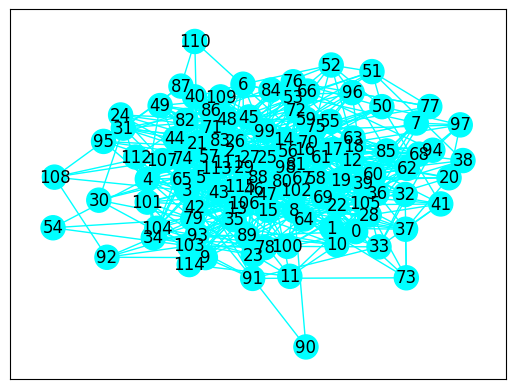

In [9]:
pos = data_analyzer.draw_graph(og_inst)

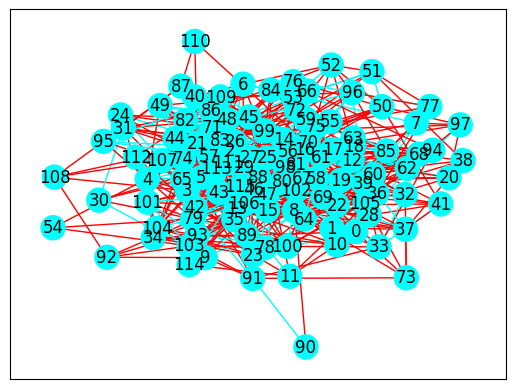

In [10]:
data_analyzer.draw_counterfactual_actions(og_inst, cf_inst, position=pos)

# Explanation Frequency

In [4]:
# Tree-Cycle
config_f_name = 'E9-TCR-128-28-0.25_GCN_Ens[DCE+OBS+iRand+RSGG]-Frequency.jsonc'
# ASD
# config_f_name = 'E4-ASD_ASDO_Ens[DCE+OBS+iRand+RSGG]-Frequency.jsonc'

### Evaluating the Explainer

In [5]:
config_path = os.path.join(module_path, 'lab', 'config', config_f_name)
runno = 2
    
print(f"Generating context for: {config_path}")
context = Context.get_context(config_path)
context.run_number = runno

context.logger.info(f"Executing: {context.config_file} Run: {context.run_number}")
context.logger.info("Creating the evaluation manager....................................")


if 'do-pairs' in context.conf:
    context.logger.info("Creating the paired  evaluators.....................................")
    eval_manager = PairedEvaluatorManager(context)
else:
    context.logger.info("Creating the evaluators......................................................")
    eval_manager = EvaluatorManager(context)

context.logger.info(
    "Evaluating the explainers............................................................."
)
eval_manager.evaluate()

Generating context for: c:\Work\AIIM\gretel-silver\GRETEL\lab\config\E4-ASD_ASDO_Ens[DCE+OBS+iRand+RSGG]-Frequency.jsonc
2024-04-29 18:18:39,715568659 | INFO | 3996 - Executing: c:\Work\AIIM\gretel-silver\GRETEL\lab\config\E4-ASD_ASDO_Ens[DCE+OBS+iRand+RSGG]-Frequency.jsonc Run: 2
2024-04-29 18:18:39,715568681 | INFO | 3996 - Creating the evaluation manager....................................
2024-04-29 18:18:39,715568705 | INFO | 3996 - Creating the paired  evaluators.....................................
2024-04-29 18:18:39,715568794 | INFO | 3996 - Loading: ASD-ca8cc36049eb8589f68c35b0d8eebfbb
2024-04-29 18:18:39,715568862 | INFO | 3996 - Created: ASD-ca8cc36049eb8589f68c35b0d8eebfbb
2024-04-29 18:18:40,715568911 | INFO | 3996 - Creating: ASDOracle-74012801e4bd624973d6c15c0a46f2eb
2024-04-29 18:18:40,715568934 | INFO | 3996 - ASDOracle trained in: 0.021112918853759766 secs
2024-04-29 18:18:40,715568971 | INFO | 3996 - Saved: ASDOracle-74012801e4bd624973d6c15c0a46f2eb
2024-04-29 18:18

c:\Work\AIIM\gretel-silver\GRETEL\src\explainer\generative\gans\graph\res_gen.py:61: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\TensorShape.cpp:3641.)
  edge_probabilities += rebuild_adj_matrix(len(node_features), edge_list, edge_attr.T,self.device)


2024-04-29 18:18:48,715576922 | INFO | 3996 - evaluated instance with id 1
2024-04-29 18:18:48,715576922 | INFO | 3996 - Evaluating instance with id 2
2024-04-29 18:18:54,715583355 | INFO | 3996 - evaluated instance with id 2
2024-04-29 18:18:54,715583357 | INFO | 3996 - Evaluating instance with id 3
2024-04-29 18:18:57,715586262 | INFO | 3996 - evaluated instance with id 3
2024-04-29 18:18:57,715586264 | INFO | 3996 - Evaluating instance with id 4
2024-04-29 18:18:59,715588893 | INFO | 3996 - evaluated instance with id 4
2024-04-29 18:18:59,715588895 | INFO | 3996 - Evaluating instance with id 5
2024-04-29 18:19:02,715591764 | INFO | 3996 - evaluated instance with id 5
2024-04-29 18:19:02,715591765 | INFO | 3996 - Evaluating instance with id 6
2024-04-29 18:19:05,715594542 | INFO | 3996 - evaluated instance with id 6
2024-04-29 18:19:05,715594546 | INFO | 3996 - Evaluating instance with id 7
2024-04-29 18:19:08,715597190 | INFO | 3996 - evaluated instance with id 7
2024-04-29 18:19:08

### Aggregating the results

In [6]:
results_path = os.path.join(module_path, 'lab', 'output', 'results')
stats_file_path = os.path.join(module_path, 'lab', 'stats', 'results.csv')
res = data_analyzer.create_aggregated_dataframe(results_path)
res.to_csv(stats_file_path)
res

2024-04-29 18:27:32,716100952 | INFO | 3996 - Instantiating: src.evaluation.evaluation_metric_runtime.RuntimeMetric
2024-04-29 18:27:32,716100952 | INFO | 3996 - Instantiating: src.evaluation.evaluation_metric_ged.GraphEditDistanceMetric
2024-04-29 18:27:32,716100952 | INFO | 3996 - Instantiating: src.evaluation.evaluation_metric_oracle_calls.OracleCallsMetric
2024-04-29 18:27:32,716100952 | INFO | 3996 - Instantiating: src.evaluation.evaluation_metric_correctness.CorrectnessMetric
2024-04-29 18:27:32,716100952 | INFO | 3996 - Instantiating: src.evaluation.evaluation_metric_sparsity.SparsityMetric
2024-04-29 18:27:32,716100952 | INFO | 3996 - Instantiating: src.evaluation.evaluation_metric_fidelity.FidelityMetric
2024-04-29 18:27:32,716100952 | INFO | 3996 - Instantiating: src.evaluation.evaluation_metric_oracle_accuracy.OracleAccuracyMetric
2024-04-29 18:27:32,716100964 | INFO | 3996 - Instantiating: src.evaluation.evaluation_metric_runtime.RuntimeMetric
2024-04-29 18:27:32,716100964 

,scope,dataset,oracle,explainer,RuntimeMetric,RuntimeMetric-std,GraphEditDistanceMetric,GraphEditDistanceMetric-std,OracleCallsMetric,OracleCallsMetric-std,CorrectnessMetric,CorrectnessMetric-std,SparsityMetric,SparsityMetric-std,FidelityMetric,FidelityMetric-std,OracleAccuracyMetric,OracleAccuracyMetric-std
0,demo,ASD-15273954d84e872cf0b021cd4477bfdc,ASDOracle-9e4f3586dc330143b7849fc540b25739,ObliviousBidirectionalSearchExplainer,0.409879,0.000000,10.454545,0.000000,367.363636,0.000000,1.000000,0.000000,0.013553,0.000000e+00,0.636364,0.000000,0.818182,0.0
1,demo,TreeCyclesRand-19c1e767fe0a580f23abfb7486c24b37,OracleTorch-f16f95a68a8f23c404f4684325d241af,ObliviousBidirectionalSearchExplainer,1.417809,0.914864,4.454545,0.454545,239.615385,155.692308,0.923077,0.076923,0.063462,1.174480e-03,0.923077,0.076923,1.000000,0.0
2,demo,TreeCyclesRand-b7fc179170d4f9e81e9efdc2d9265e91,TreeCyclesOracle-e67513927e99743ff3718c388e68fb02,RSGG,0.063364,0.015690,23.760000,0.590000,15.640000,2.160000,1.000000,0.000000,0.427735,1.044173e-02,1.000000,0.000000,1.000000,0.0
3,ensembles,ASD-ca8cc36049eb8589f68c35b0d8eebfbb,ASDOracle-74012801e4bd624973d6c15c0a46f2eb,ExplanationFrequency,5.226193,0.227379,561.190883,20.283476,1012.806931,3.321782,0.460396,0.074257,0.665147,1.905344e-02,0.232673,0.024752,0.772277,0.0
4,ensembles,ASD-ca8cc36049eb8589f68c35b0d8eebfbb,ASDOracle-74012801e4bd624973d6c15c0a46f2eb,ExplanationIntersection,5.194375,0.005148,583.252976,0.877976,1032.886139,4.232673,0.405941,0.009901,0.662231,7.808701e-03,0.227723,0.009901,0.772277,0.0
5,ensembles,ASD-ca8cc36049eb8589f68c35b0d8eebfbb,ASDOracle-74012801e4bd624973d6c15c0a46f2eb,ExplanationTopSelect,5.141137,0.016324,10.029703,0.000000,1029.495050,25.792079,1.000000,0.000000,0.013008,1.131176e-07,0.544554,0.000000,0.772277,0.0
6,ensembles,ASD-ca8cc36049eb8589f68c35b0d8eebfbb,ASDOracle-74012801e4bd624973d6c15c0a46f2eb,ExplanationUnion,6.153826,0.987345,540.351852,2.370370,1007.658416,3.648515,0.534653,0.000000,0.679479,5.700593e-04,0.257426,0.000000,0.772277,0.0
7,examples_configs,TreeInfinityCycles-b2c6afc380be14e45aa51e3277b...,OracleTorch-cc748bacdbe65b8cfdf99cb980aab5c5,OvershootCounterfactualExplainer,0.505787,0.000000,0.500000,0.000000,18.921875,0.000000,0.007812,0.000000,0.000062,0.000000e+00,0.007812,0.000000,1.000000,0.0


### Analyzing instances

In [7]:
evaluator = eval_manager.evaluators[0]
evaluator

In [8]:
inst_cf_pairs = evaluator.get_instance_explanation_pairs()
og_inst = inst_cf_pairs[2][0]
cf_inst = inst_cf_pairs[2][1]

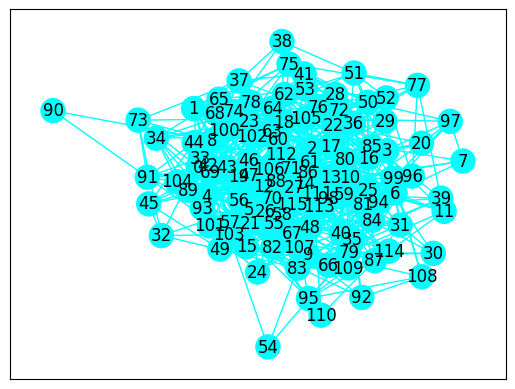

In [9]:
pos = data_analyzer.draw_graph(og_inst)

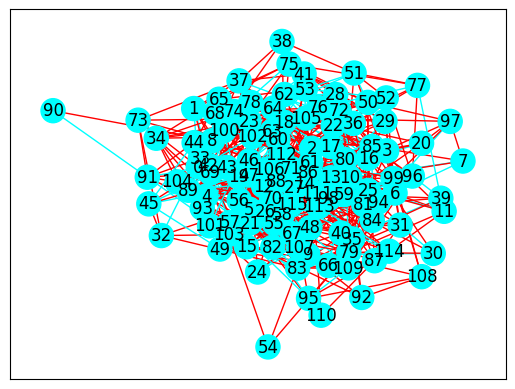

In [10]:
data_analyzer.draw_counterfactual_actions(og_inst, cf_inst, position=pos)

# Random Explanation Aggregator

In [4]:
# Tree-Cycles
config_f_name = 'E6-TCR-100-28_GCN_Ens[OBS+2xiRand+RSGG]-Rand.jsonc'
# ASD
# config_f_name = 'E5-ASD_ASDO_Ens[OBS+2xiRand+RSGG]-Rand.jsonc'

### Evaluating the Explainer

In [5]:
config_path = os.path.join(module_path, 'lab', 'config', config_f_name)
runno = 2
    
print(f"Generating context for: {config_path}")
context = Context.get_context(config_path)
context.run_number = runno

context.logger.info(f"Executing: {context.config_file} Run: {context.run_number}")
context.logger.info("Creating the evaluation manager....................................")


if 'do-pairs' in context.conf:
    context.logger.info("Creating the paired  evaluators.....................................")
    eval_manager = PairedEvaluatorManager(context)
else:
    context.logger.info("Creating the evaluators......................................................")
    eval_manager = EvaluatorManager(context)

context.logger.info(
    "Evaluating the explainers............................................................."
)
eval_manager.evaluate()

Generating context for: c:\Work\AIIM\gretel-silver\GRETEL\lab\config\E6-TCR-100-28_GCN_Ens[OBS+2xiRand+RSGG]-Rand.jsonc
2024-05-01 18:21:42,888551042 | INFO | 14004 - Executing: c:\Work\AIIM\gretel-silver\GRETEL\lab\config\E6-TCR-100-28_GCN_Ens[OBS+2xiRand+RSGG]-Rand.jsonc Run: 2
2024-05-01 18:21:42,888551064 | INFO | 14004 - Creating the evaluation manager....................................
2024-05-01 18:21:42,888551087 | INFO | 14004 - Creating the paired  evaluators.....................................
2024-05-01 18:21:42,888551181 | INFO | 14004 - Loading: TreeCyclesRand-266bb3721206805597afc8c4184fe0ab
2024-05-01 18:21:42,888551242 | INFO | 14004 - Created: TreeCyclesRand-266bb3721206805597afc8c4184fe0ab
2024-05-01 18:21:42,888551256 | INFO | 14004 - Instantiating: src.oracle.nn.gcn.DownstreamGCN
2024-05-01 18:21:42,888551359 | INFO | 14004 - Instantiating: torch.optim.RMSprop
2024-05-01 18:21:42,888551361 | INFO | 14004 - Instantiating: torch.nn.CrossEntropyLoss
2024-05-01 18:21

c:\Work\AIIM\gretel-silver\GRETEL\src\explainer\generative\gans\graph\res_gen.py:61: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\TensorShape.cpp:3641.)
  edge_probabilities += rebuild_adj_matrix(len(node_features), edge_list, edge_attr.T,self.device)


2024-05-01 18:22:04,888573062 | INFO | 14004 - evaluated instance with id 1
2024-05-01 18:22:04,888573065 | INFO | 14004 - Evaluating instance with id 2
2024-05-01 18:22:08,888576950 | INFO | 14004 - evaluated instance with id 2
2024-05-01 18:22:08,888576952 | INFO | 14004 - Evaluating instance with id 3
2024-05-01 18:22:12,888581284 | INFO | 14004 - evaluated instance with id 3
2024-05-01 18:22:12,888581284 | INFO | 14004 - Evaluating instance with id 4
2024-05-01 18:22:16,888585275 | INFO | 14004 - evaluated instance with id 4
2024-05-01 18:22:16,888585277 | INFO | 14004 - Evaluating instance with id 5
2024-05-01 18:22:20,888589027 | INFO | 14004 - evaluated instance with id 5
2024-05-01 18:22:20,888589033 | INFO | 14004 - Evaluating instance with id 6
2024-05-01 18:22:24,888593598 | INFO | 14004 - evaluated instance with id 6
2024-05-01 18:22:24,888593599 | INFO | 14004 - Evaluating instance with id 7
2024-05-01 18:22:25,888594187 | INFO | 14004 - evaluated instance with id 7
2024-0

### Aggregating the results

In [6]:
results_path = os.path.join(module_path, 'lab', 'output', 'results')
stats_file_path = os.path.join(module_path, 'lab', 'stats', 'results.csv')
res = data_analyzer.create_aggregated_dataframe(results_path)
res.to_csv(stats_file_path)
res

2024-05-01 18:32:56,889225186 | INFO | 14004 - Instantiating: src.evaluation.evaluation_metric_runtime.RuntimeMetric
2024-05-01 18:32:56,889225188 | INFO | 14004 - Instantiating: src.evaluation.evaluation_metric_ged.GraphEditDistanceMetric
2024-05-01 18:32:56,889225189 | INFO | 14004 - Instantiating: src.evaluation.evaluation_metric_oracle_calls.OracleCallsMetric
2024-05-01 18:32:56,889225191 | INFO | 14004 - Instantiating: src.evaluation.evaluation_metric_correctness.CorrectnessMetric
2024-05-01 18:32:56,889225192 | INFO | 14004 - Instantiating: src.evaluation.evaluation_metric_sparsity.SparsityMetric
2024-05-01 18:32:56,889225194 | INFO | 14004 - Instantiating: src.evaluation.evaluation_metric_fidelity.FidelityMetric
2024-05-01 18:32:56,889225195 | INFO | 14004 - Instantiating: src.evaluation.evaluation_metric_oracle_accuracy.OracleAccuracyMetric
2024-05-01 18:32:56,889225198 | INFO | 14004 - Instantiating: src.evaluation.evaluation_metric_runtime.RuntimeMetric
2024-05-01 18:32:56,88

2024-05-01 18:32:56,889225240 | INFO | 14004 - Instantiating: src.evaluation.evaluation_metric_fidelity.FidelityMetric
2024-05-01 18:32:56,889225242 | INFO | 14004 - Instantiating: src.evaluation.evaluation_metric_oracle_accuracy.OracleAccuracyMetric
2024-05-01 18:32:56,889225247 | INFO | 14004 - Instantiating: src.evaluation.evaluation_metric_runtime.RuntimeMetric
2024-05-01 18:32:56,889225249 | INFO | 14004 - Instantiating: src.evaluation.evaluation_metric_ged.GraphEditDistanceMetric
2024-05-01 18:32:56,889225252 | INFO | 14004 - Instantiating: src.evaluation.evaluation_metric_oracle_calls.OracleCallsMetric
2024-05-01 18:32:56,889225254 | INFO | 14004 - Instantiating: src.evaluation.evaluation_metric_correctness.CorrectnessMetric
2024-05-01 18:32:56,889225255 | INFO | 14004 - Instantiating: src.evaluation.evaluation_metric_sparsity.SparsityMetric
2024-05-01 18:32:56,889225257 | INFO | 14004 - Instantiating: src.evaluation.evaluation_metric_fidelity.FidelityMetric
2024-05-01 18:32:56,

,scope,dataset,oracle,explainer,RuntimeMetric,RuntimeMetric-std,GraphEditDistanceMetric,GraphEditDistanceMetric-std,OracleCallsMetric,OracleCallsMetric-std,CorrectnessMetric,CorrectnessMetric-std,SparsityMetric,SparsityMetric-std,FidelityMetric,FidelityMetric-std,OracleAccuracyMetric,OracleAccuracyMetric-std
0,demo,ASD-15273954d84e872cf0b021cd4477bfdc,ASDOracle-9e4f3586dc330143b7849fc540b25739,ObliviousBidirectionalSearchExplainer,0.409879,0.000000,10.454545,0.000000,367.363636,0.000000,1.000000,0.000000,0.013553,0.000000e+00,0.636364,0.000000,0.818182,0.0
1,demo,TreeCyclesRand-19c1e767fe0a580f23abfb7486c24b37,OracleTorch-f16f95a68a8f23c404f4684325d241af,ObliviousBidirectionalSearchExplainer,1.417809,0.914864,4.454545,0.454545,239.615385,155.692308,0.923077,0.076923,0.063462,1.174480e-03,0.923077,0.076923,1.000000,0.0
2,demo,TreeCyclesRand-b7fc179170d4f9e81e9efdc2d9265e91,TreeCyclesOracle-e67513927e99743ff3718c388e68fb02,RSGG,0.063364,0.015690,23.760000,0.590000,15.640000,2.160000,1.000000,0.000000,0.427735,1.044173e-02,1.000000,0.000000,1.000000,0.0
3,ensembles,ASD-ca8cc36049eb8589f68c35b0d8eebfbb,ASDOracle-74012801e4bd624973d6c15c0a46f2eb,ExplanationFrequency,5.226193,0.227379,561.190883,20.283476,1012.806931,3.321782,0.460396,0.074257,0.665147,1.905344e-02,0.232673,0.024752,0.772277,0.0
4,ensembles,ASD-ca8cc36049eb8589f68c35b0d8eebfbb,ASDOracle-74012801e4bd624973d6c15c0a46f2eb,ExplanationIntersection,5.194375,0.005148,583.252976,0.877976,1032.886139,4.232673,0.405941,0.009901,0.662231,7.808701e-03,0.227723,0.009901,0.772277,0.0
5,ensembles,ASD-ca8cc36049eb8589f68c35b0d8eebfbb,ASDOracle-74012801e4bd624973d6c15c0a46f2eb,ExplanationRandom,7.619725,0.000000,14.104167,0.000000,1029.891089,0.000000,0.237624,0.000000,0.004347,0.000000e+00,0.138614,0.000000,0.772277,0.0
6,ensembles,ASD-ca8cc36049eb8589f68c35b0d8eebfbb,ASDOracle-74012801e4bd624973d6c15c0a46f2eb,ExplanationTopSelect,5.141137,0.016324,10.029703,0.000000,1029.495050,25.792079,1.000000,0.000000,0.013008,1.131176e-07,0.544554,0.000000,0.772277,0.0
7,ensembles,ASD-ca8cc36049eb8589f68c35b0d8eebfbb,ASDOracle-74012801e4bd624973d6c15c0a46f2eb,ExplanationUnion,6.153826,0.987345,540.351852,2.370370,1007.658416,3.648515,0.534653,0.000000,0.679479,5.700593e-04,0.257426,0.000000,0.772277,0.0
8,ensembles,TreeCyclesRand-266bb3721206805597afc8c4184fe0ab,OracleTorch-74759045c06692032f0eea69f225627c,ExplanationRandom,3.266816,0.106357,4.909497,0.974714,413.289062,101.515625,0.550781,0.191406,0.052175,2.566187e-02,0.550781,0.191406,1.000000,0.0
9,examples_configs,TreeInfinityCycles-b2c6afc380be14e45aa51e3277b...,OracleTorch-cc748bacdbe65b8cfdf99cb980aab5c5,OvershootCounterfactualExplainer,0.505787,0.000000,0.500000,0.000000,18.921875,0.000000,0.007812,0.000000,0.000062,0.000000e+00,0.007812,0.000000,1.000000,0.0


# Analyzing Instances

In [7]:
evaluator = eval_manager.evaluators[0]
evaluator

In [8]:
inst_cf_pairs = evaluator.get_instance_explanation_pairs()
og_inst = inst_cf_pairs[2][0]
cf_inst = inst_cf_pairs[2][1]

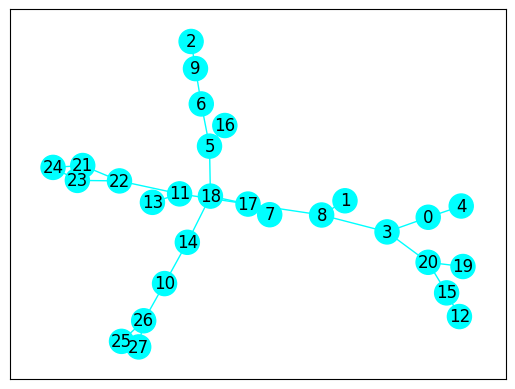

In [26]:
pos = data_analyzer.draw_graph(og_inst)

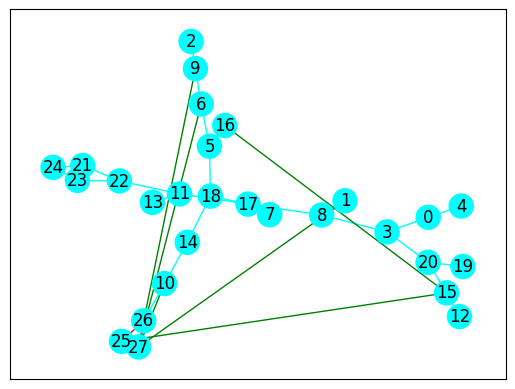

In [27]:
data_analyzer.draw_counterfactual_actions(og_inst, cf_inst, position=pos)

In [22]:
og_inst.label

1

In [23]:
cf_inst.label

0